In [107]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold  

%pylab inline 
%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

Populating the interactive namespace from numpy and matplotlib


In [108]:
pd.set_option('precision', 3)
np.random.seed(4)

In [109]:
df = pd.DataFrame.from_csv('main_data.csv')

In [110]:
df.columns

Index(['NAME', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_pct', 'P3', 'PA3', 'P3_pct',
       'P2', 'PA2', 'P2_pct', 'eFG_pct', 'FT', 'FTA', 'FT_pct', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'futPTS'],
      dtype='object')

In [111]:
df.shape

(922, 27)

In [112]:
df.head(3)

,NAME,G,GS,MP,FG,FGA,FG_pct,P3,PA3,P3_pct,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,futPTS
0,Dalibor Bagaric,31.667,0.0,9.267,0.900,2.700,0.325,0.0,0.000,0.000,...,0.800,1.467,2.267,0.400,0.300,0.433,0.667,1.533,2.300,0.0
1,John Bagley,75.000,29.0,22.233,3.333,7.367,0.448,0.0,0.233,0.078,...,0.533,1.833,2.367,5.167,1.133,0.100,2.167,1.400,8.167,3.9
2,James Bailey,75.333,0.0,20.300,3.533,7.133,0.489,0.0,0.000,0.167,...,1.667,3.467,5.133,0.800,0.567,1.200,1.900,3.067,9.100,2.2


In [113]:
#y,X = patsy.dmatrices('futPTS ~ PTS + G + FG_pct + FG+ MP + ORB + DRB + TOV + eFG_pct + TRB + STL + PF',data=df,return_type='dataframe')
# create baseline
matrix_string = 'futPTS ~ G + GS + MP + FG + FGA + FG_pct + P3 + PA3 + P3_pct + P2 + PA2 + P2_pct + eFG_pct + FT + FTA + FT_pct + ORB + DRB + TRB + AST + STL + BLK + TOV + PF + PTS'
y,X = patsy.dmatrices(matrix_string,data=df,return_type='dataframe')

In [116]:
base_model = sm.OLS(y,X) 
base_fit = base_model.fit()

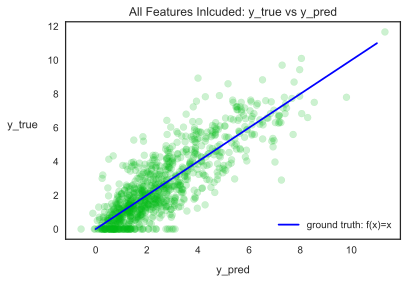

In [155]:
y_pred = base_fit.predict(X)
plt.scatter(y_pred,y, alpha=0.2, color='#03bc16')
plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.title('All Features Inlcuded: y_true vs y_pred')

plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')
plt.legend(loc='lower right', shadow=False)

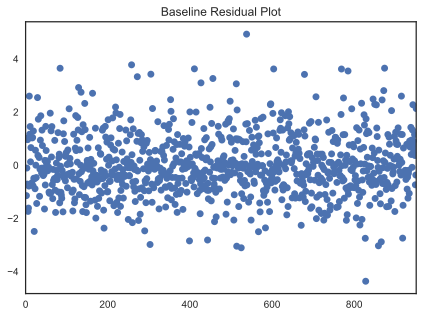

In [118]:
base_residual = base_fit.resid.plot(style='o', figsize=(7,5), alpha=0.2, title='Baseline Residual Plot')

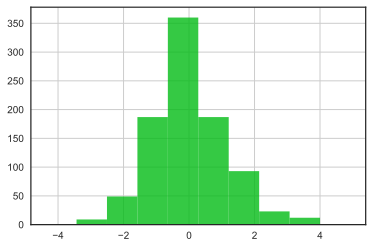

In [147]:
base_residual_hist = base_fit.resid.hist(alpha=0.8, color='#03bc16')

In [120]:
base_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 futPTS   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     87.87
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          4.71e-221
Time:                        14:48:42   Log-Likelihood:                -1430.3
No. Observations:                 922   AIC:                             2913.
Df Residuals:                     896   BIC:                             3038.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9838      0.352      2.792      0.005       0.292       1.675
G              0.0130      0.003      4.077      0.000       0.007       0.019
GS             0.0031      0.004      0.838      0.402      -0.004       0.010
MP            -0.0447      0.022     -2.035      0.042      -0.088      -0.002
FG            -4.7425      2.374     -1.998      0.046      -9.401      -0.084
FGA            1.0773      1.474      0.731      0.465      -1.816       3.970
FG_pct        12.2998      4.049      3.038      0.002       4.353      20.247
P3             0.0451      2.156      0.021      0.983      -4.187       4.277
PA3           -0.9339      1.492     -0.626      0.532      -3.863       1.995
P3_pct         0.8477      0.431      1.966      0.050       0.001       1.694
P2             2.4079      1.796      1.341      0.180      -1.116       5.932
PA2           -1.5834      1.480     -1.070      0.285      -4.489       1.322
P2_pct        -2.0377      2.189     -0.931      0.352      -6.333       2.258
eFG_pct      -11.7377      3.693     -3.179      0.002     -18.985      -4.490
FT            -1.0897      0.950     -1.147      0.252      -2.954       0.775
FTA           -0.3660      0.216     -1.697      0.090      -0.789       0.057
FT_pct        -0.1304      0.389     -0.335      0.737      -0.894       0.633
ORB           -2.3417      1.363     -1.718      0.086      -5.016       0.333
DRB           -2.4227      1.360     -1.781      0.075      -5.092       0.247
TRB            2.4393      1.358      1.796      0.073      -0.227       5.105
AST           -0.0255      0.060     -0.423      0.672      -0.144       0.093
STL            0.4261      0.174      2.453      0.014       0.085       0.767
BLK            0.0223      0.122      0.183      0.855      -0.218       0.262
TOV           -0.1846      0.163     -1.132      0.258      -0.504       0.135
PF            -0.1454      0.101     -1.444      0.149      -0.343       0.052
PTS            2.0180      0.913      2.210      0.027       0.226       3.810
==============================================================================
Omnibus:                       44.331   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.775
Skew:                           0.420   Prob(JB):                     1.42e-14
Kurtosis:                       3.978   Cond. No.                     9.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# features to remove: GS, FGA, P3, PA3, P2, PA2, P2_pct, FT, FTA, FT_pct, ORB, DRB, TRB, AST, BLK, TOV, PF

In [121]:
string_few = 'futPTS ~ G + MP'
yfew,Xfew = patsy.dmatrices(string_few,data=df,return_type='dataframe')
model_few = sm.OLS(yfew,Xfew)
fit_few = model_few.fit()

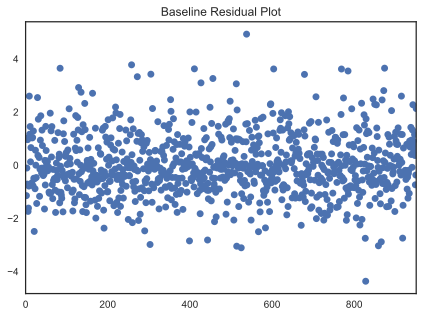

In [122]:
base_residual = base_fit.resid.plot(style='o', figsize=(7,5), alpha=0.2, title='Baseline Residual Plot')

In [123]:
fit_few.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 futPTS   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     644.0
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          1.46e-175
Time:                        14:48:49   Log-Likelihood:                -1597.5
No. Observations:                 922   AIC:                             3201.
Df Residuals:                     919   BIC:                             3216.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7999      0.115     -6.932      0.000      -1.026      -0.573
G              0.0062      0.003      1.945      0.052   -5.72e-05       0.012
MP             0.1698      0.008     21.186      0.000       0.154       0.185
==============================================================================
Omnibus:                       74.924   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.920
Skew:                           0.641   Prob(JB):                     1.65e-23
Kurtosis:                       4.044   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

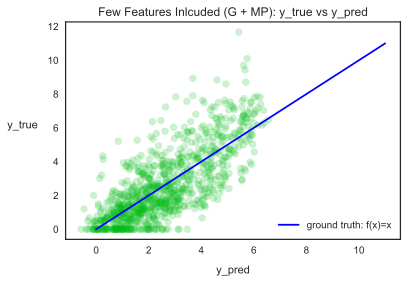

In [154]:
y_pf = fit_few.predict(Xfew)
plt.scatter(y_pf,y, alpha=0.2, color='#03bc16')
plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.title('Few Features Inlcuded (G + MP): y_true vs y_pred')

plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')
plt.legend(loc='lower right', shadow=False)

In [125]:
string_a = 'futPTS ~ TOV + ORB'
ya,Xa = patsy.dmatrices(string_a,data=df,return_type='dataframe')
model_a = sm.OLS(ya,Xa)
fit_a = model_a.fit()

In [126]:
fit_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 futPTS   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     519.1
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          1.40e-151
Time:                        14:48:57   Log-Likelihood:                -1652.9
No. Observations:                 922   AIC:                             3312.
Df Residuals:                     919   BIC:                             3326.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1002      0.096     -1.041      0.298      -0.289       0.089
TOV            1.7559      0.076     23.113      0.000       1.607       1.905
ORB            0.5183      0.072      7.186      0.000       0.377       0.660
==============================================================================
Omnibus:                       82.052   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.896
Skew:                           0.688   Prob(JB):                     1.12e-25
Kurtosis:                       4.047   Cond. No.                         4.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

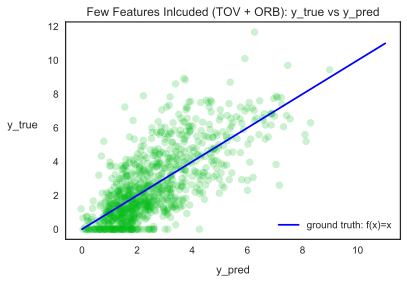

In [157]:
y_preda = fit_a.predict(Xa)
plt.scatter(y_preda,y, alpha=0.2, color='#03bc16')
plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.title('Few Features Inlcuded (TOV + ORB): y_true vs y_pred')

plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')
plt.legend(loc='lower right', shadow=False)

In [130]:
string_b = 'futPTS ~ FGA + FG_pct + FTA + FT_pct'
yb,Xb = patsy.dmatrices(string_b,data=df,return_type='dataframe')
model_b = sm.OLS(yb,Xb)
fit_b = model_b.fit()

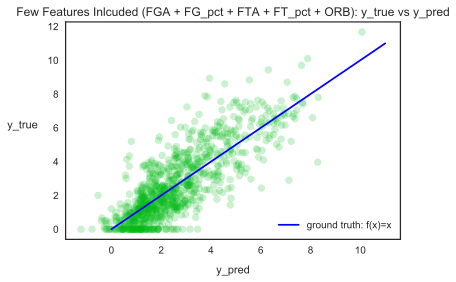

In [158]:
y_predb = fit_b.predict(Xb)
plt.scatter(y_predb,y, alpha=0.2, color='#03bc16')
plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.title('Few Features Inlcuded (FGA + FG_pct + FTA + FT_pct + ORB): y_true vs y_pred')

plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')
plt.legend(loc='lower right', shadow=False)

In [132]:
fit_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 futPTS   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     457.1
Date:                Sun, 22 Jul 2018   Prob (F-statistic):          1.33e-216
Time:                        14:50:01   Log-Likelihood:                -1495.9
No. Observations:                 922   AIC:                             3002.
Df Residuals:                     917   BIC:                             3026.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2713      0.286     -4.449      0.000      -1.832      -0.711
FGA            0.3195      0.020     16.137      0.000       0.281       0.358
FG_pct         2.3074      0.588      3.924      0.000       1.153       3.461
FTA            0.3069      0.053      5.780      0.000       0.203       0.411
FT_pct         0.4232      0.306      1.385      0.166      -0.177       1.023
==============================================================================
Omnibus:                       48.761   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.451
Skew:                           0.445   Prob(JB):                     3.05e-16
Kurtosis:                       4.032   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""